In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
prod_cat= pd.read_csv('/content/prod_cat_info.csv')
tran = pd.read_csv('/content/Transactions.csv')
cust= pd.read_csv('/content/Customer.csv')
Location= pd.read_csv('/content/Location.csv')


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.


In [ ]:
#ensuring same common column name
cust.rename(columns={'customer_Id': 'cust_id'},
          inplace=True, errors='raise')

# merging 
table1 = pd.merge(tran,cust, on='cust_id',how='left')
cust_final=pd.merge(table1,prod_cat, on='prod_cat_code',how='left')
# table1.info()
cust_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,3,Kids
3,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,4,Mobiles
4,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,5,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,12,Academic
99289,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,10,Non-Fiction
99290,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,11,Children
99291,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,3,Comics


# Data Cleaning

In [ ]:
####    data cleaning and pre-processing
#dropping nulls
df = cust_final.dropna()

#marging with location table
df= pd.merge(df,Location,on='city_code',how='left')
#droppping duplicates
df = df.drop_duplicates(subset=['transaction_id'], keep='first')
df.reset_index()

#convert to appropriate data type
df['city_code']=df['city_code'].astype(int)

df['tran_date'] = pd.to_datetime(df['tran_date'])

#convert -ve to +ve to ensure consistent data format
df['Qty']=df.Qty.abs()
df['Rate']=df.Rate.abs()
df['total_amt']=df.total_amt.abs()
df.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,index,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,...,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,iso_alpha,Location,lat,long
0,0,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,...,26-09-1981,M,5,Clothing,4,Mens,VE,Venezuela,6.423750,-66.589730
1,3,29258453508,270384,2014-02-27,5,3,5,1497,785.925,8270.925,...,11-05-1973,F,8,Electronics,4,Mobiles,ZA,South Africa,-30.559482,22.937506
2,8,51750724947,273420,2014-02-24,6,5,2,791,166.110,1748.110,...,27-07-1992,M,8,Books,7,Fiction,ZA,South Africa,-30.559482,22.937506
3,14,93274880719,271509,2014-02-24,11,6,3,1363,429.345,4518.345,...,08-06-1981,M,3,Home and kitchen,2,Furnishing,IN,India,20.593684,78.962880
4,24,97439039119,272357,2014-02-23,8,3,2,824,173.040,1821.040,...,09-10-1982,F,6,Electronics,4,Mobiles,AU,Australia,-25.274398,133.775136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20857,99189,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,...,18-04-1974,M,4,Footwear,1,Mens,CN,China,35.861660,104.195397
20858,99192,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,...,21-02-1972,M,7,Books,7,Fiction,RU,Russia,61.524010,105.318756
20859,99198,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,...,27-04-1984,M,9,Clothing,4,Mens,AE,UAE,23.424076,53.847818
20860,99201,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,...,20-06-1976,M,8,Home and kitchen,2,Furnishing,ZA,South Africa,-30.559482,22.937506


2. Prepare a summary report for the merged data set.

a. Get the column names and their corresponding data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20862 entries, 0 to 99211
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     20862 non-null  int64         
 1   cust_id            20862 non-null  int64         
 2   tran_date          20862 non-null  datetime64[ns]
 3   prod_subcat_code   20862 non-null  int64         
 4   prod_cat_code      20862 non-null  int64         
 5   Qty                20862 non-null  int64         
 6   Rate               20862 non-null  int64         
 7   Tax                20862 non-null  float64       
 8   total_amt          20862 non-null  float64       
 9   Store_type         20862 non-null  object        
 10  DOB                20862 non-null  object        
 11  Gender             20862 non-null  object        
 12  city_code          20862 non-null  int64         
 13  prod_cat           20862 non-null  object        
 14  prod_s

b. Top/Bottom 10 observations


In [ ]:
df.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,iso_alpha,Location,lat,long
0,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5,Clothing,4,Mens,VE,Venezuela,6.423750,-66.589730
3,29258453508,270384,2014-02-27,5,3,5,1497,785.925,8270.925,e-Shop,11-05-1973,F,8,Electronics,4,Mobiles,ZA,South Africa,-30.559482,22.937506
8,51750724947,273420,2014-02-24,6,5,2,791,166.110,1748.110,TeleShop,27-07-1992,M,8,Books,7,Fiction,ZA,South Africa,-30.559482,22.937506
14,93274880719,271509,2014-02-24,11,6,3,1363,429.345,4518.345,e-Shop,08-06-1981,M,3,Home and kitchen,2,Furnishing,IN,India,20.593684,78.962880
24,97439039119,272357,2014-02-23,8,3,2,824,173.040,1821.040,TeleShop,09-10-1982,F,6,Electronics,4,Mobiles,AU,Australia,-25.274398,133.775136
29,45649838090,273667,2014-02-22,11,6,1,1450,152.250,1602.250,e-Shop,29-05-1981,M,9,Home and kitchen,2,Furnishing,AE,UAE,23.424076,53.847818
33,22643667930,271489,2014-02-22,12,6,1,1225,128.625,1353.625,TeleShop,21-04-1971,M,9,Home and kitchen,2,Furnishing,AE,UAE,23.424076,53.847818
37,79792372943,275108,2014-02-22,3,1,3,908,286.020,3010.020,MBR,04-11-1971,F,8,Clothing,4,Mens,ZA,South Africa,-30.559482,22.937506
40,50076728598,269014,2014-02-21,8,3,4,581,244.020,2568.020,e-Shop,27-11-1979,F,3,Electronics,4,Mobiles,IN,India,20.593684,78.962880
50,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,13-10-1986,M,1,Home and kitchen,2,Furnishing,CA,Canada,56.130366,-106.346771


In [ ]:
df.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,iso_alpha,Location,lat,long
99163,49584040240,273010,2011-01-25,5,3,2,276,57.960,609.960,e-Shop,06-08-1985,F,4,Electronics,4,Mobiles,CN,China,35.861660,104.195397
99168,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,10-08-1976,M,8,Books,7,Fiction,ZA,South Africa,-30.559482,22.937506
99174,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,12-10-1991,M,4,Electronics,4,Mobiles,CN,China,35.861660,104.195397
99179,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,17-01-1980,F,8,Books,7,Fiction,ZA,South Africa,-30.559482,22.937506
99185,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,28-06-1975,F,6,Home and kitchen,2,Furnishing,AU,Australia,-25.274398,133.775136
99189,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,18-04-1974,M,4,Footwear,1,Mens,CN,China,35.861660,104.195397
99192,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7,Books,7,Fiction,RU,Russia,61.524010,105.318756
99198,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9,Clothing,4,Mens,AE,UAE,23.424076,53.847818
99201,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8,Home and kitchen,2,Furnishing,ZA,South Africa,-30.559482,22.937506
99211,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1,Books,7,Fiction,CA,Canada,56.130366,-106.346771



c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [ ]:
df.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code,prod_sub_cat_code,lat,long
count,2.086200e+04,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000
mean,5.000468e+10,271028.651040,6.156169,3.761432,3.003643,785.989407,247.868354,2608.519346,5.474355,3.784201,20.478292,33.215362
std,2.896765e+10,2433.163405,3.722385,1.675880,1.420365,415.652773,186.647906,1964.247006,2.864398,2.229923,28.762785,85.473054
min,3.268991e+06,266783.000000,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000,1.000000,1.000000,-30.559482,-106.346771
25%,2.486175e+10,268943.000000,3.000000,2.000000,2.000000,426.000000,97.965000,1030.965000,3.000000,2.000000,6.423750,-66.589730
50%,5.006882e+10,271008.500000,5.000000,4.000000,3.000000,788.000000,198.450000,2088.450000,5.000000,4.000000,20.593684,78.962880
75%,7.512538e+10,273123.000000,10.000000,5.000000,4.000000,1148.000000,363.510000,3825.510000,8.000000,7.000000,37.090240,104.195397
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000,7.000000,61.524010,133.775136


,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code,prod_sub_cat_code,lat,long
count,2.086200e+04,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000
mean,5.000468e+10,271028.651040,6.156169,3.761432,3.003643,785.989407,247.868354,2608.519346,5.474355,3.784201,20.478292,33.215362
std,2.896765e+10,2433.163405,3.722385,1.675880,1.420365,415.652773,186.647906,1964.247006,2.864398,2.229923,28.762785,85.473054
min,3.268991e+06,266783.000000,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000,1.000000,1.000000,-30.559482,-106.346771
25%,2.486175e+10,268943.000000,3.000000,2.000000,2.000000,426.000000,97.965000,1030.965000,3.000000,2.000000,6.423750,-66.589730
50%,5.006882e+10,271008.500000,5.000000,4.000000,3.000000,788.000000,198.450000,2088.450000,5.000000,4.000000,20.593684,78.962880
75%,7.512538e+10,273123.000000,10.000000,5.000000,4.000000,1148.000000,363.510000,3825.510000,8.000000,7.000000,37.090240,104.195397
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000,7.000000,61.524010,133.775136


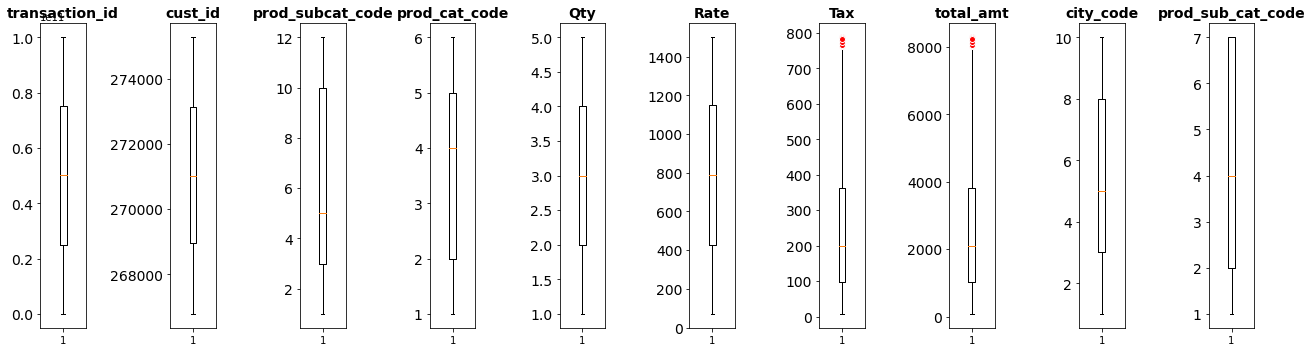

In [ ]:
#plotting on graph
df1=df[['transaction_id','cust_id','prod_subcat_code','prod_cat_code','Qty','Rate','Tax','total_amt','city_code','prod_sub_cat_code']]
# df1 = df.plot(kind='box',figsize=(14,6))
# df1.plot(kind='')
# sns.boxplot(data=df[[cols]], orient="v")
# sns.boxplot(data=df)
# sns.boxplot(data=pd.melt(df))

# plt.show()
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df1.columns), figsize=(18,5))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df1.iloc[:,i], flierprops=red_circle)
    ax.set_title(df1.columns[i], fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

df.describe()

d. Frequency tables for all the categorical variables

In [ ]:
# df.describe().T
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,iso_alpha,Location,lat,long
count,2.086200e+04,20862.000000,20862,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862.000000,20862,20862,20862,20862.000000,20862,20862.000000,20862,20862,20862,20862.000000,20862.000000
unique,NaN,NaN,1129,NaN,NaN,NaN,NaN,NaN,NaN,4,3984,2,NaN,6,NaN,4,10,10,NaN,NaN
top,NaN,NaN,2011-10-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,e-Shop,27-12-1988,M,NaN,Books,NaN,Mens,IN,India,NaN,NaN
freq,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,8426,30,10706,NaN,5481,NaN,7169,2196,2196,NaN,NaN
first,NaN,NaN,2011-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.000468e+10,271028.651040,NaN,6.156169,3.761432,3.003643,785.989407,247.868354,2608.519346,NaN,NaN,NaN,5.474355,NaN,3.784201,NaN,NaN,NaN,20.478292,33.215362
std,2.896765e+10,2433.163405,NaN,3.722385,1.675880,1.420365,415.652773,186.647906,1964.247006,NaN,NaN,NaN,2.864398,NaN,2.229923,NaN,NaN,NaN,28.762785,85.473054
min,3.268991e+06,266783.000000,NaN,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,-30.559482,-106.346771
25%,2.486175e+10,268943.000000,NaN,3.000000,2.000000,2.000000,426.000000,97.965000,1030.965000,NaN,NaN,NaN,3.000000,NaN,2.000000,NaN,NaN,NaN,6.423750,-66.589730


3. Generate histograms for all continuous variables and frequency bars for categorical variables.

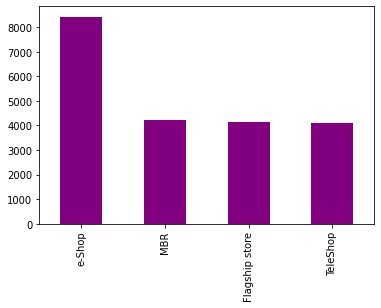

In [ ]:
#get numeric data
dfnum = df._get_numeric_data()
#get non-numeric or categorical  data columns
dfcat =df.select_dtypes(include=['object'])           #useful cols- Store_type, Gender, prod_cat, prod_subcat

# df.info()
dfcat['Store_type'].value_counts().plot(kind='bar',color='purple')

M    10706
F    10156
Name: Gender, dtype: int64

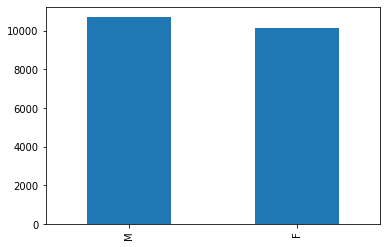

In [ ]:
dfcat['Gender'].value_counts().plot(kind='bar') # can use colormap='Paired'
dfcat['Gender'].value_counts()

,prod_cat
Books,5481
Electronics,4482
Home and kitchen,3730
Footwear,2707
Clothing,2674
Bags,1788


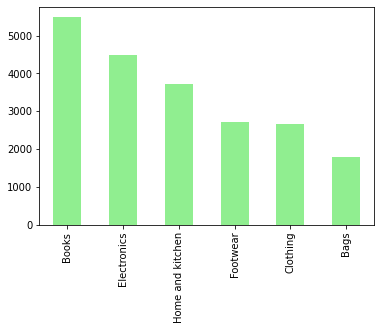

In [ ]:
dfcat['prod_cat'].value_counts().plot(kind='bar',color='lightgreen' )
dfcat['prod_cat'].value_counts().to_frame()

In [ ]:
dfnum         #useful cols- Qty,	Rate,	Tax,	total_amt,	city_code	


,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code,prod_sub_cat_code,lat,long
0,80712190438,270351,1,1,5,772,405.300,4265.300,5,4,6.423750,-66.589730
3,29258453508,270384,5,3,5,1497,785.925,8270.925,8,4,-30.559482,22.937506
8,51750724947,273420,6,5,2,791,166.110,1748.110,8,7,-30.559482,22.937506
14,93274880719,271509,11,6,3,1363,429.345,4518.345,3,2,20.593684,78.962880
24,97439039119,272357,8,3,2,824,173.040,1821.040,6,4,-25.274398,133.775136
...,...,...,...,...,...,...,...,...,...,...,...,...
99189,30856003613,266866,4,2,2,444,93.240,981.240,4,1,35.861660,104.195397
99192,94340757522,274550,12,5,1,1264,132.720,1396.720,7,7,61.524010,105.318756
99198,89780862956,270022,4,1,1,677,71.085,748.085,9,4,23.424076,53.847818
99201,85115299378,271020,2,6,4,1052,441.840,4649.840,8,2,-30.559482,22.937506


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9f651da50>]],
      dtype=object)

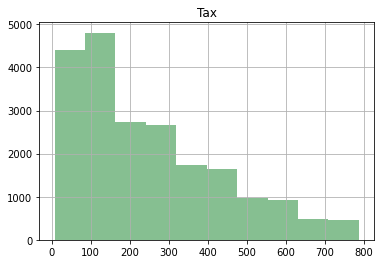

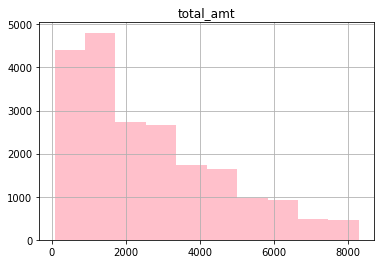

In [ ]:
df.hist(column='Tax',color='#86bf91')
df.hist(column='total_amt',color='pink')
# df.hist()

In [ ]:
df['total_amt'].corr(df['Tax'])

1.0

#Checking correlation between 'tax' and 'total_amt'

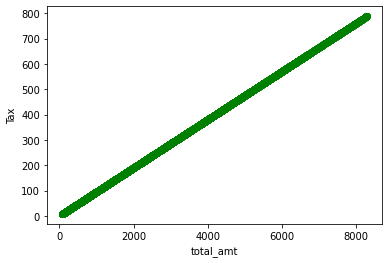

In [ ]:
sns.regplot(x=df['total_amt'], y=df['Tax'],color='green') 

4. Calculate the following information using the merged dataset :

a. Time period of the available transaction data


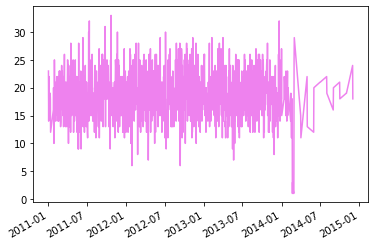

In [ ]:
df['tran_date'].value_counts().plot(kind='line',color='violet')

5. Analyze which product categories are more popular among females vs male customers.


In [ ]:
df[['Gender','prod_cat']].groupby('Gender').agg('max')

,prod_cat
Gender,
F,Home and kitchen
M,Home and kitchen


In [ ]:
gender = df[['Gender','prod_cat','Qty']].groupby(['Gender','prod_cat'], as_index=False).sum()
gender
# gender[['Gender','prod_cat','Qty']].max()
# gender['Qty'].sort(ascending=False)

,Gender,prod_cat,Qty
0,F,Bags,2693
1,F,Books,7952
2,F,Clothing,3888
3,F,Electronics,6402
4,F,Footwear,4158
5,F,Home and kitchen,5484
6,M,Bags,2656
7,M,Books,8445
8,M,Clothing,4175
9,M,Electronics,7147


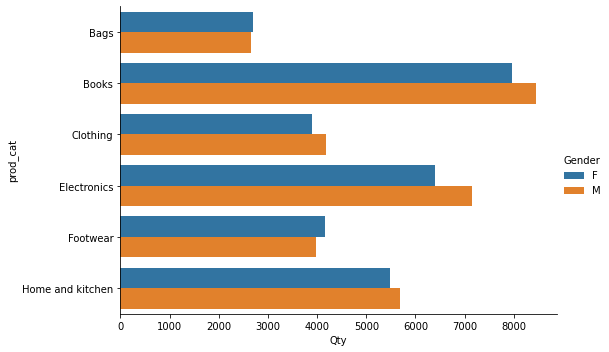

In [ ]:
sns.catplot(data=gender, y='prod_cat', x='Qty',
            kind='bar', hue='Gender',aspect=1.6, orient='h')

6. Which City code has the maximum customers and what was the percentage of customers from
that city?


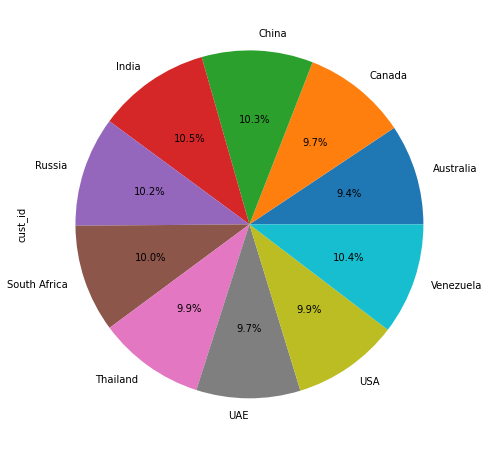

In [ ]:
# df.info()

df[['city_code','cust_id']].groupby('city_code').agg('nunique')
# cross checking
# df[['city_code','cust_id']].groupby('city_code').agg('nunique').sum()
# df['cust_id'].nunique()

df.groupby("Location").cust_id.nunique().plot(kind = "pie" , figsize = (8,8),autopct='%1.1f%%')           #1

In [ ]:
loc = df[['iso_alpha','Location','lat','long']].groupby(['iso_alpha','Location','lat','long']).agg({'Location':'count'})
loc.rename(columns={'Location': 'freq'},inplace=True, errors='raise')
loc=loc.reset_index()
loc.sort_values(ascending=False,by='freq')

,iso_alpha,Location,lat,long,freq
4,IN,India,20.593684,78.962880,2196
3,CN,China,35.861660,104.195397,2195
8,VE,Venezuela,6.423750,-66.589730,2139
5,RU,Russia,61.524010,105.318756,2126
6,TH,Thailand,15.870032,100.992541,2102
9,ZA,South Africa,-30.559482,22.937506,2092
2,CA,Canada,56.130366,-106.346771,2066
7,US,USA,37.090240,-95.712891,2042
0,AE,UAE,23.424076,53.847818,1977
1,AU,Australia,-25.274398,133.775136,1927


In [ ]:
import plotly.express as px
fig = px.scatter_geo(loc, locations="Location",color="Location",hover_name="Location", size="freq",projection="natural earth")
fig.show()

7. Which store type sells the maximum products by value and by quantity?

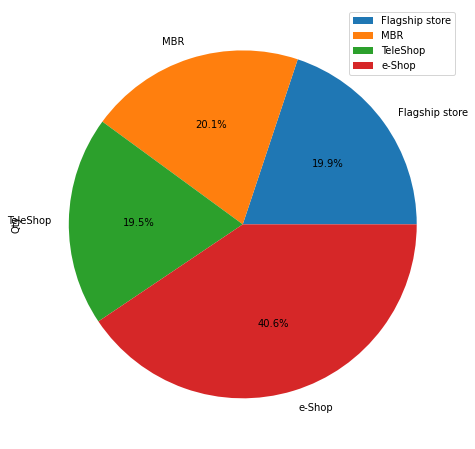

In [ ]:
labels=['Flagship store','MBR','TeleShop','e-Shop']
store = df[['Store_type','Qty']].groupby(['Store_type'], as_index=False).sum()
# df.groupby("city_code").cust_id.nunique().plot(kind = "pie" , figsize = (8,8),autopct='%1.1f%%')  
store.plot(kind='pie',y='Qty',labels=labels,autopct='%1.1f%%',figsize=(8,8))

8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?


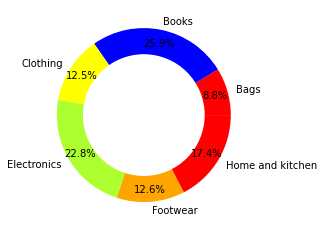

In [ ]:
s= df[['Store_type','prod_cat','total_amt']].groupby(['Store_type','prod_cat'], as_index=False).sum()
flag_store=s.where(s['Store_type']=='Flagship store').dropna()
flag_store
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
Labels=['Bags','Books','Clothing','Electronics','Footwear','Home and kitchen']
# fg.plot(kind='bar')

plt.pie(flag_store['total_amt'], colors=colors, labels=Labels ,autopct='%1.1f%%', pctdistance=0.85)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Displaying Chart
plt.show()


In [ ]:
flag_store

,Store_type,prod_cat,total_amt
0,Flagship store,Bags,961188.670
1,Flagship store,Books,2819814.140
2,Flagship store,Clothing,1363944.595
3,Flagship store,Electronics,2486886.480
4,Flagship store,Footwear,1378478.660
5,Flagship store,Home and kitchen,1895420.865


9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [ ]:
# male = df.where([(df['Gender']=='M') & (df['prod_cat']=='Electronics')]).dropna()
male = df[(df.Gender=='M')&(df.prod_cat=='Electronics')]
male.total_amt.sum()

6309873.765000001

10. How many customers have more than 10 unique transactions


In [ ]:
# df['cust_id'].head(10).unique().where(df.t)
x=df[['cust_id','transaction_id']].groupby('cust_id',as_index=False).nunique()
x.where(x.transaction_id>10).dropna().nunique()

cust_id           6
transaction_id    1
dtype: int64

11. For all customers aged between 25 - 35, find out:

a. What was the total amount spent for “Electronics” and “Books” product categories?


In [ ]:
df['age'] =  (pd.to_datetime('today').year-pd.to_datetime(df['DOB'].values).year)
Age = df.where((df.age>25)&(df.age<35)&((df.prod_cat=='Electronics') | (df.prod_cat=='Books'))).dropna()
# Age.total_amt.sum()
Age.total_amt.max()

# Age[['prod_cat','total_amt']].groupby(['prod_cat']).sum().plot(kind='bar',orient='h')
# sns.catplot(data=Age, y=Age.prod_cat, x=Age.total_amt, kind='heat',hue=Age.prod_cat,aspect=1.6,orient='h')

# (pd.to_datetime('today').year-pd.to_datetime('1956-07-01').year)
# df['DOB'].values

8281.975

11. b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

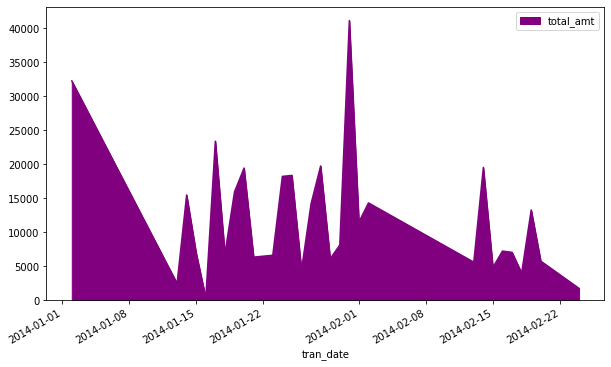

In [ ]:
# df['age'] =  (pd.to_datetime('today').year-pd.to_datetime(df['DOB'].values).year)
date = df.where((df.age>25)&(df.age<35)&((df.tran_date>'2014-01-01')&(df.tran_date<'2014-03-01'))).dropna()
date.total_amt.sum()
date[['tran_date','total_amt']].groupby(['tran_date']).sum().plot(kind='area',figsize=(10,6),color='purple')

# (pd.to_datetime('today').year-pd.to_datetime('1956-07-01').year)
# df['DOB'].values


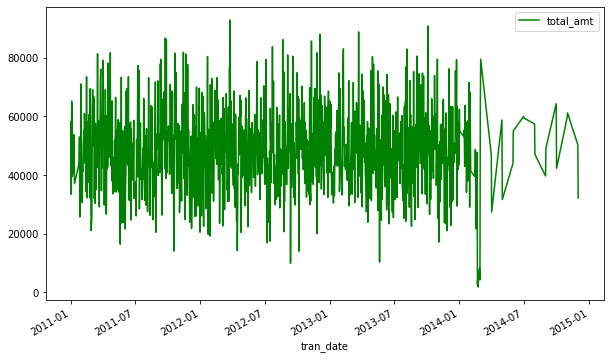

In [ ]:
df[['tran_date','total_amt']].groupby(['tran_date']).sum().plot(kind='line',figsize=(10,6),color='green')

In [ ]:
df['age'].describe()

count    20862.000000
mean        40.954894
std          6.610782
min         30.000000
25%         35.000000
50%         41.000000
75%         47.000000
max         52.000000
Name: age, dtype: float64

Highest transaction amount

In [ ]:
df[['Location','total_amt']].groupby('Location').agg({'total_amt':'sum'}).sort_values(by='total_amt', ascending=False)


,total_amt
Location,
India,5724564.105
China,5673952.895
Russia,5546708.830
Thailand,5545275.645
Venezuela,5506136.545
South Africa,5475151.240
USA,5443002.370
Canada,5357832.285
UAE,5262116.080


Most ordered category

In [ ]:
df[['prod_cat','Qty']].groupby(['prod_cat'], as_index=False).sum().sort_values(by='Qty', ascending=False)


,prod_cat,Qty
1,Books,16397
3,Electronics,13549
5,Home and kitchen,11178
4,Footwear,8126
2,Clothing,8063
0,Bags,5349


most revenue generating store

In [ ]:
df[['Store_type','total_amt']].groupby('Store_type').sum().sort_values(by='total_amt', ascending=False)

,total_amt
Store_type,
e-Shop,2.218065e+07
Flagship store,1.090573e+07
MBR,1.090135e+07
TeleShop,1.043120e+07


Which location has most no.of stores

In [ ]:
df[['Store_type','Location']].groupby('Location').agg({'Store_type':'count'}).sort_values(by='Store_type', ascending=False)

,Store_type
Location,
India,2196
China,2195
Venezuela,2139
Russia,2126
Thailand,2102
South Africa,2092
Canada,2066
USA,2042
UAE,1977


Quantity sold by Location

In [ ]:
df[['Location','Qty']].groupby('Location').agg({'Qty':'sum'}).sort_values(by='Qty', ascending=False)

,Qty
Location,
China,6626
India,6577
Venezuela,6390
Russia,6330
Thailand,6286
South Africa,6270
USA,6213
Canada,6173
UAE,5989
